# 008: Evaluation of Fairness

In [117]:
import sys

import numpy as np
import seaborn as sns

sys.path.append("../")
from model_selection import cross_validation
from models import LogisticRegression
from metrics import f_score, auc_roc
from preprocessing import preprocess, get_raw_data
from visualizations import plot_class_distribution_by_group

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Class and label distributions

In [115]:
x_train_orig, x_test_orig, y_train_orig, train_ids, test_ids = get_raw_data()
race = x_train_orig[:, 245]
sex = x_train_orig[:, 50]

In [157]:
age = x_train_orig[:, 247]

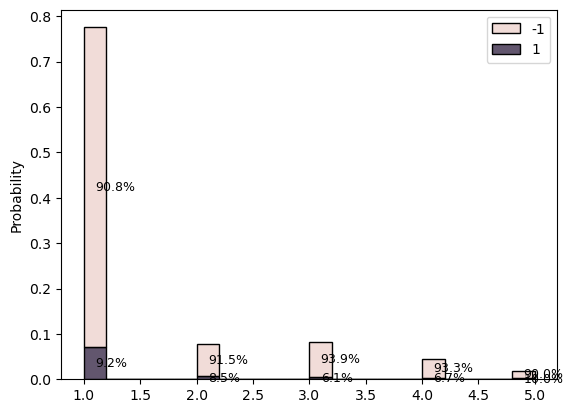

In [114]:
plot_class_distribution_by_group(y_train_orig, race)

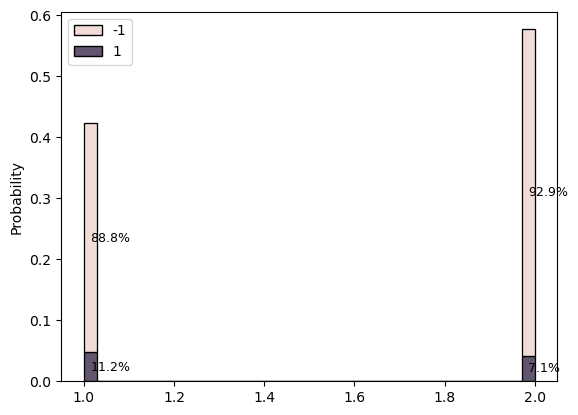

In [112]:
plot_class_distribution_by_group(y_train_orig, sex)

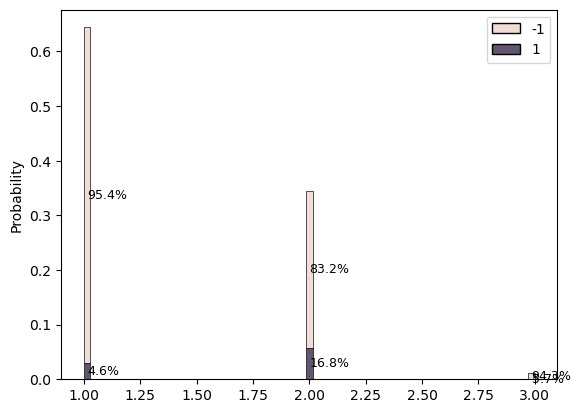

In [158]:
plot_class_distribution_by_group(y_train_orig, age)

In [74]:
x_train, _, y_train = preprocess()

Loading raw data...
Replacing missing value codes with np.nan...
Applying one-hot encoding...
Imputing missing values...
Removing invariant features...


In [ ]:
def run_experiment(attr, num_samples = 100000):
    return cross_validation(x_train[:num_samples], y_train[:num_samples], LogisticRegression, scoring_groups=attr[:num_samples])

def print_results(results, value_names):
    latex = []
    latex.append("\\begin{table}[t]")
    latex.append("\\caption{Estimated performance metrics (\\%±STD) by protected attribute.}")
    latex.append("\\label{tab:results}")
    latex.append("\\centering")
    latex.append("\\begin{tabular}{lc}") # cc}")
    latex.append("\\toprule")
    latex.append("\\textbf{Attribute} & \\textbf{F1-score (\\%)}\\")# & \\textbf{F2-score (\\%)} & \\textbf{AUC-ROC (\\%)} \\\\")
    latex.append("\\midrule")
    for group in results.f1_scores[0].keys():
        f1_scores = [fold_result[group] for fold_result in results.f1_scores]
        f2_scores = [fold_result[group] for fold_result in results.f2_scores]
        aucrocs = [fold_result[group] for fold_result in results.auc_rocs]
        f1_mean, f1_std = np.mean(f1_scores) * 100, np.std(f1_scores) * 100
        f2_mean, f2_std = np.mean(f2_scores) * 100, np.std(f2_scores) * 100
        auc_mean, auc_std = np.mean(aucrocs) * 100, np.std(aucrocs) * 100

        latex.append(f"{value_names[group]} & {f1_mean:.1f}±{f1_std:.1f}\\\\")#  & {f2_mean:.1f}±{f2_std:.1f} & {auc_mean:.1f}±{auc_std:.1f} \\\\")
        # print(f"  F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
        # print(f"  F2 Score: {np.mean(f2_scores):.4f} ± {np.std(f2_scores):.4f}")
        # print(f"  AUC-ROC: {np.mean(aucrocs):.4f} ± {np.std(aucrocs):.4f}")
    latex.append("\\bottomrule")
    latex.append("\\end{tabular}")
    latex.append("\\end{table}")
    latex_table = "\n".join(latex)
    print(latex_table)

In [154]:
results = run_experiment(sex)
value_names = {"1.0": "Male", "2.0": "Female"}
print_results(results, value_names)

Starting fold 1/5 with 80000 samples
Starting fold 2/5 with 80000 samples
Starting fold 3/5 with 80000 samples
Starting fold 4/5 with 80000 samples
Starting fold 5/5 with 80000 samples
\begin{table}[t]
\caption{Estimated performance metrics (\%±STD) by protected attribute.}
\label{tab:results}
\centering
\begin{tabular}{lccc}
\toprule
\textbf{Attribute} & \textbf{F1-score (\%)} & \textbf{F2-score (\%)} & \textbf{AUC-ROC (\%)} \\
\midrule
Male & 44.6±1.3 & 53.2±3.1 & 85.3±0.3 \\
Female & 38.3±0.6 & 44.2±3.2 & 85.0±0.5 \\
\bottomrule
\end{tabular}
\end{table}


In [153]:
results = run_experiment(race)
value_names = {"1.0": "White", "2.0": "Black", "3.0": "Other", "4.0": "Multiracial", "5.0": "Hispanic", "nan": "Unknown"}
print_results(results, value_names)

Starting fold 1/5 with 80000 samples
Starting fold 2/5 with 80000 samples
Starting fold 3/5 with 80000 samples
Starting fold 4/5 with 80000 samples
Starting fold 5/5 with 80000 samples
\begin{table}[t]
\caption{Estimated performance metrics (\%±STD) by protected attribute.}
\label{tab:results}
\centering
\begin{tabular}{lccc}
\toprule
\textbf{Attribute} & \textbf{F1-score (\%)} & \textbf{F2-score (\%)} & \textbf{AUC-ROC (\%)} \\
\midrule
White & 42.2±0.6 & 49.6±3.2 & 85.5±0.4 \\
Black & 38.6±2.6 & 45.5±2.3 & 83.5±1.6 \\
Other & 36.3±4.6 & 41.7±4.4 & 84.3±2.1 \\
Multiracial & 42.5±6.2 & 49.7±3.7 & 88.5±1.4 \\
Hispanic & 47.8±6.8 & 57.2±8.4 & 88.7±1.5 \\
Unknown & 41.5±4.0 & 48.2±3.1 & 82.7±1.2 \\
\bottomrule
\end{tabular}
\end{table}


In [ ]:
results = run_experiment(race)
value_names = {"1.0": "White", "2.0": "Black", "3.0": "Other", "4.0": "Multiracial", "5.0": "Hispanic", "nan": "Unknown"}
print_results(results, value_names)

In [159]:
results = run_experiment(age)
value_names = {"1.0": "Under 65", "2.0": "Above 65", "3.0": "Unknown"}
print_results(results, value_names)

Starting fold 1/5 with 80000 samples
Starting fold 2/5 with 80000 samples
Starting fold 3/5 with 80000 samples
Starting fold 4/5 with 80000 samples
Starting fold 5/5 with 80000 samples
\begin{table}[t]
\caption{Estimated performance metrics (\%±STD) by protected attribute.}
\label{tab:results}
\centering
\begin{tabular}{lc}
\toprule
\textbf{Attribute} & \textbf{F1-score (\%)}
\midrule
Under 65 & 36.4±1.1\\
Above 65 & 43.9±1.1\\
Unknown & 28.9±12.6\\
\bottomrule
\end{tabular}
\end{table}
